# Introduction

Here we check the sPHENIX field map and separate the in-steel field from the outside

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

## Initialization

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

Welcome to JupyROOT 6.26/06


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-12.1.0/release/release_ana/ana.410`

In [4]:
import uproot
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

import numpy as np

from os.path import exists


/tmp/ipykernel_8471/1817987804.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


# Before 2022: 2D Field map export

In [5]:
MapFile2D = '/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sPHENIX.2d.root'

# 2D field map scaling on its working point
# https://github.com/ECCE-EIC/macros/blob/prop.7.0/detectors/EICDetector/Fun4All_G4_EICDetector.C#L460 
magfield_2D_rescale = -1.4 / 1.5;

In [6]:
display(Markdown(f'2D field map from `{MapFile2D}`'))

2D field map from `/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sPHENIX.2d.root`

In [7]:
file = uproot.open(MapFile2D)

In [8]:
file.keys()

['fieldmap;1', 'h1;1']

In [9]:
file['fieldmap'].keys()

['r', 'z', 'br', 'bz']

In [10]:
df_fieldmap = file['fieldmap'].arrays(library="pd")

df_fieldmap['br'] = df_fieldmap['br'].apply(lambda x: x * magfield_2D_rescale)
df_fieldmap['bz'] = df_fieldmap['bz'].apply(lambda x: x * magfield_2D_rescale)

In [11]:
df_fieldmap

,r,z,br,bz
0,300.0,400.0,0.004610,-0.002614
1,298.0,400.0,0.004837,-0.002521
2,296.0,400.0,0.005066,-0.002391
3,294.0,400.0,0.005322,-0.002253
4,292.0,400.0,0.005585,-0.002108
...,...,...,...,...
60546,8.0,-400.0,-0.002663,0.007943
60547,6.0,-400.0,-0.002007,0.008361
60548,4.0,-400.0,-0.001348,0.008561
60549,2.0,-400.0,-0.000696,0.008769


In [12]:

X=df_fieldmap['z'].values
Y=df_fieldmap['r'].values
Z=df_fieldmap.apply(lambda x: np.sqrt(x['br']*x['br'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


## Check field map plot

And Hcal is treated as a homogenious material in 2D field map, which has to be modified via our HCal field after-burner to produce 3D field that match Hcal sample structure. 

/tmp/ipykernel_8471/1728907782.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


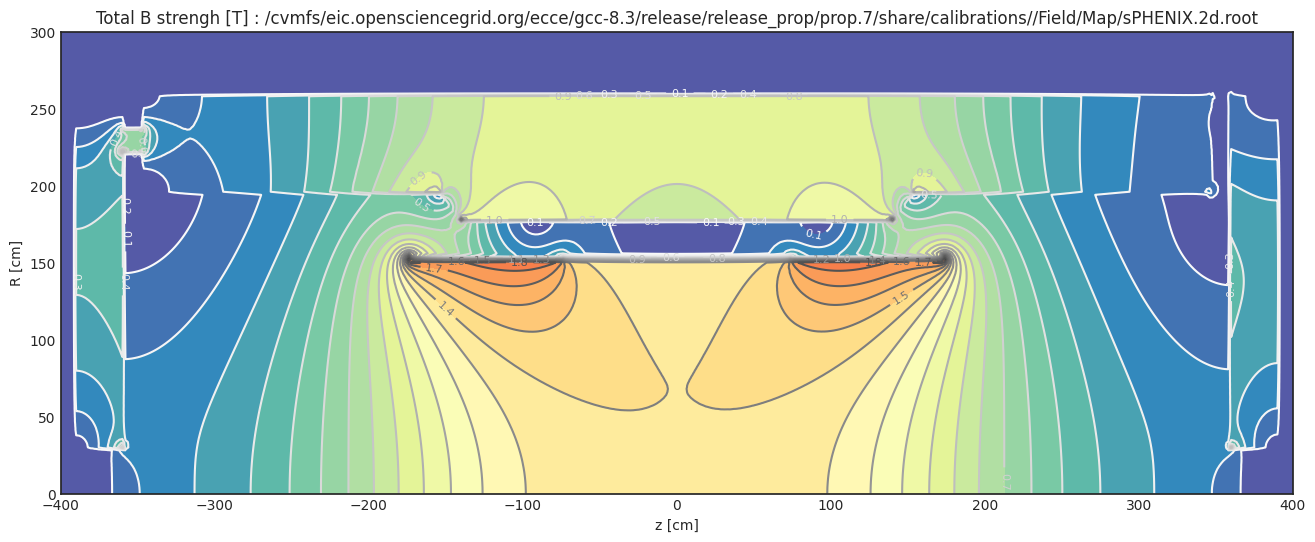

In [13]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('R [cm]')
ax.set_title("Total B strengh [T] : " + MapFile2D)

fig.show()

In [14]:
df_fieldmap.to_csv('sPHENIX.2d.csv');

# Since 2022: 3D field map in simulation

In [15]:
MapFile3D = '/phenix/u/jinhuang/links/sPHENIX_work/FieldMap/justoutsidedoor.table'

In [16]:
display(Markdown(f'3D field map from `{MapFile3D}`'))

3D field map from `/phenix/u/jinhuang/links/sPHENIX_work/FieldMap/justoutsidedoor.table`

In [17]:
df_fieldmap = pd.read_csv(MapFile3D, header=None,  sep='\s+', dtype=np.float64,
                          names = ['x',	'y',	'z',	'bx[Gauss]',	'by[Gauss]',	'bz[Gauss]',	'hz[OERSTED]'])

In [18]:
df_fieldmap['bx']=df_fieldmap.apply(lambda x: x['bx[Gauss]']*1e-4, axis=1)
df_fieldmap['by']=df_fieldmap.apply(lambda x: x['by[Gauss]']*1e-4, axis=1)
df_fieldmap['bz']=df_fieldmap.apply(lambda x: x['bz[Gauss]']*1e-4, axis=1)

In [19]:
df_fieldmap

,x,y,z,bx[Gauss],by[Gauss],bz[Gauss],hz[OERSTED],bx,by,bz
0,-200.0,-200.0,-355.0,140.553537,140.952915,49.961153,49.961153,0.014055,0.014095,0.004996
1,-200.0,-200.0,-350.0,184.310205,183.229527,31.581920,31.581920,0.018431,0.018323,0.003158
2,-200.0,-200.0,-345.0,191.824367,192.634034,-26.869239,-26.869239,0.019182,0.019263,-0.002687
3,-200.0,-200.0,-340.0,207.819256,208.713912,-87.459238,-87.459238,0.020782,0.020871,-0.008746
4,-200.0,-200.0,-335.0,232.804021,232.484913,-189.282130,-189.282130,0.023280,0.023248,-0.018928
...,...,...,...,...,...,...,...,...,...,...
938218,200.0,200.0,335.0,249.383715,248.764002,-204.178472,-204.178472,0.024938,0.024876,-0.020418
938219,200.0,200.0,340.0,222.382446,223.125931,-94.498718,-94.498718,0.022238,0.022313,-0.009450
938220,200.0,200.0,345.0,205.035579,205.721628,-29.422017,-29.422017,0.020504,0.020572,-0.002942
938221,200.0,200.0,350.0,196.809218,195.443753,33.397448,33.397448,0.019681,0.019544,0.003340


/tmp/ipykernel_8471/2164255805.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_fieldmap.hist(ax=axis, bins=100)


array([[<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>],
       [<AxesSubplot: title={'center': 'bx[Gauss]'}>,
        <AxesSubplot: title={'center': 'by[Gauss]'}>,
        <AxesSubplot: title={'center': 'bz[Gauss]'}>],
       [<AxesSubplot: title={'center': 'hz[OERSTED]'}>,
        <AxesSubplot: title={'center': 'bx'}>,
        <AxesSubplot: title={'center': 'by'}>],
       [<AxesSubplot: title={'center': 'bz'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

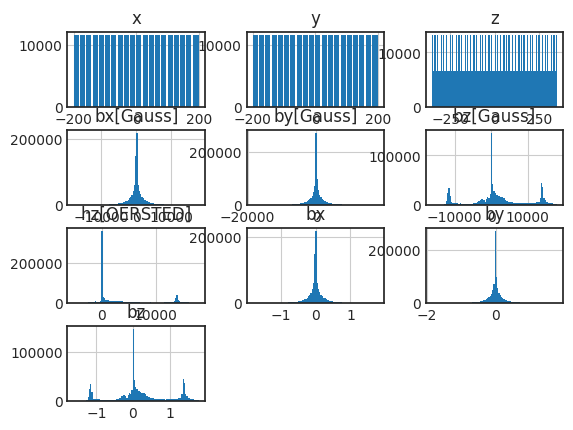

In [20]:
#define number of subplots
fig, axis = plt.subplots(1, 1)

#create histogram for each column in DataFrame
df_fieldmap.hist(ax=axis, bins=100)

In [21]:
df_fieldmap.agg(['min', 'max'])

,x,y,z,bx[Gauss],by[Gauss],bz[Gauss],hz[OERSTED],bx,by,bz
min,-200.0,-200.0,-355.0,-17948.182022,-18479.878825,-16157.062576,-5235.976231,-1.794818,-1.847988,-1.615706
max,200.0,200.0,355.0,17939.707768,17951.885865,18046.572590,18046.572590,1.793971,1.795189,1.804657


In [22]:
df_fieldmap[(df_fieldmap['x'] == 0) & (df_fieldmap['y'] == 0) & (df_fieldmap['z'] == 0) ]

,x,y,z,bx[Gauss],by[Gauss],bz[Gauss],hz[OERSTED],bx,by,bz
469111,0.0,0.0,0.0,0.346852,-0.104271,13848.146319,13848.146319,0.000035,-0.00001,1.384815


## Check field map plot

### `x=0` plane

Plotted both in $|B|$ and $B_z$

In [23]:
df_fieldmap_yz = df_fieldmap[df_fieldmap['x'] == 0]

In [24]:
df_fieldmap_yz

,x,y,z,bx[Gauss],by[Gauss],bz[Gauss],hz[OERSTED],bx,by,bz
463320,0.0,-200.0,-355.0,-0.343266,2.855873,53.395690,53.395690,-3.432660e-05,0.000286,0.005340
463321,0.0,-200.0,-350.0,-288.023685,5768.813229,-21.113741,-0.005057,-2.880237e-02,0.576881,-0.002111
463322,0.0,-200.0,-345.0,-289.053343,5772.943800,-218.554502,-0.052480,-2.890533e-02,0.577294,-0.021855
463323,0.0,-200.0,-340.0,-289.196812,5780.349836,-447.596251,-0.107837,-2.891968e-02,0.578035,-0.044760
463324,0.0,-200.0,-335.0,-289.375862,5788.682800,-694.028294,-0.168033,-2.893759e-02,0.578868,-0.069403
...,...,...,...,...,...,...,...,...,...,...
474898,0.0,200.0,335.0,19.106683,6085.045272,-725.345956,-0.183590,1.910668e-03,0.608505,-0.072535
474899,0.0,200.0,340.0,19.027899,6077.973192,-466.962485,-0.117621,1.902790e-03,0.607797,-0.046696
474900,0.0,200.0,345.0,18.992625,6071.092312,-226.470347,-0.056856,1.899263e-03,0.607109,-0.022647
474901,0.0,200.0,350.0,18.980054,6067.004442,-16.272816,-0.004073,1.898005e-03,0.606700,-0.001627


In [25]:

X=df_fieldmap_yz['z'].values
Y=df_fieldmap_yz['y'].values
Z=df_fieldmap_yz.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


/tmp/ipykernel_8471/2608094341.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


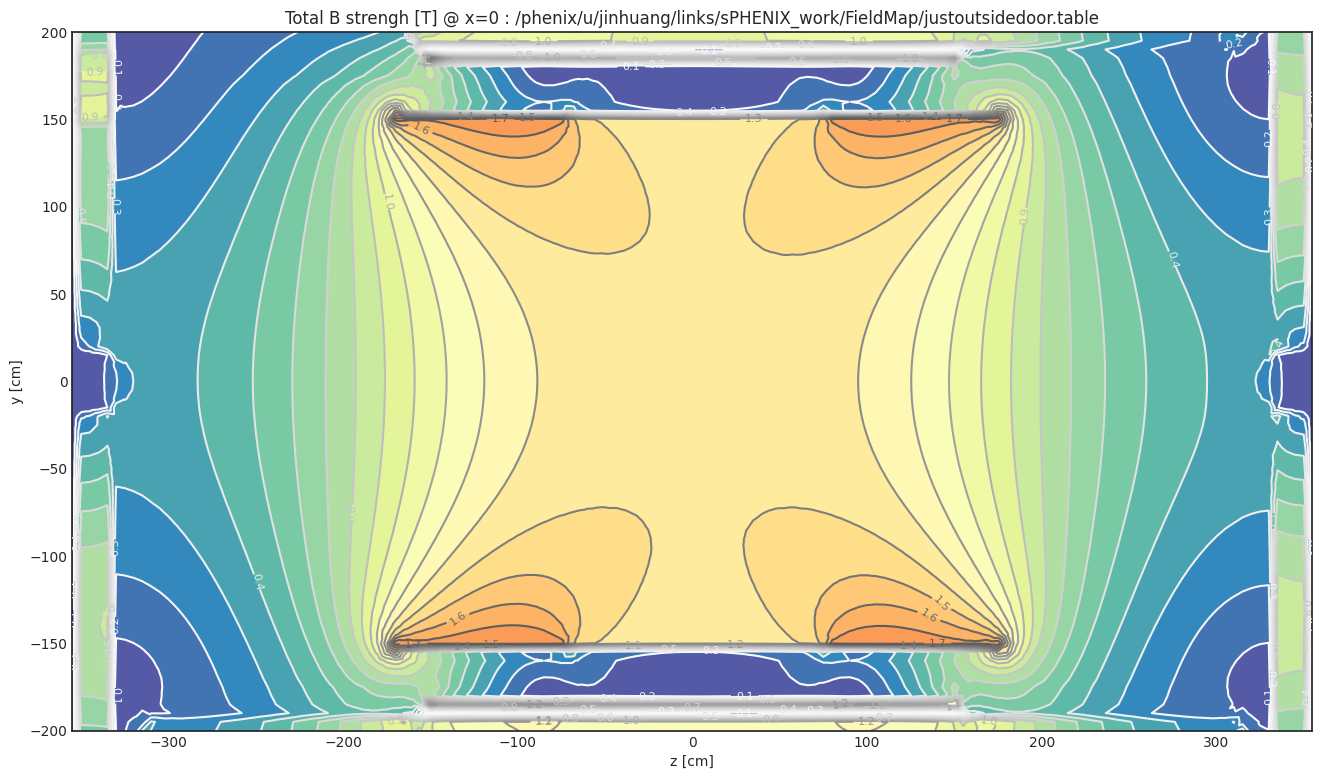

In [26]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)

fig.show()

/tmp/ipykernel_8471/2989865075.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


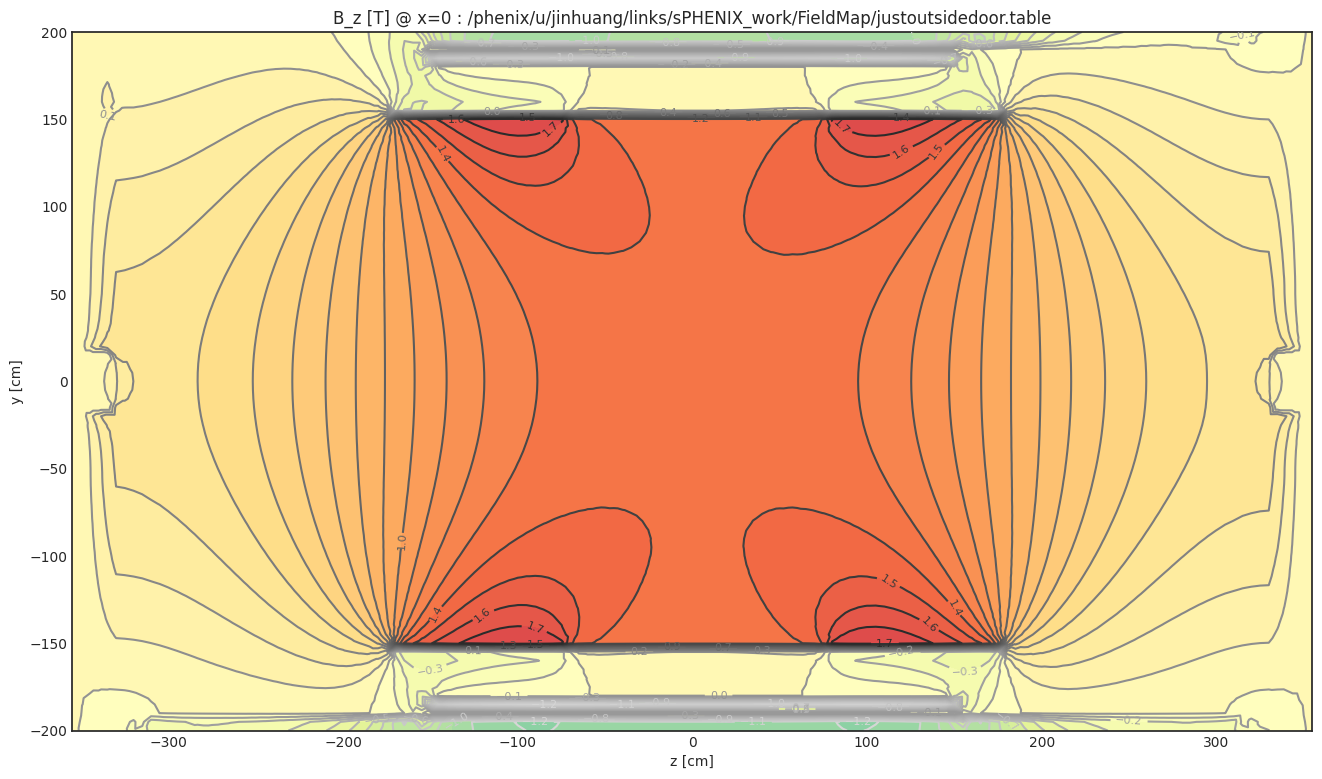

In [27]:
limits =  np.arange(-2.5,2.5,.1);

fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,df_fieldmap_yz['bz'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,df_fieldmap_yz['bz'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("B_z [T] @ x=0 : " + MapFile3D)

fig.show()

# In steel vs out of steel

Next let's see whether there are sufficient space point around HCal to tell field from in steel vs outside. The stat for field point in the gap is low given the small gap, and the field points in the HCal randomly points to in the steel and outside the steel. Given G4 field map use a 3D interpolation that assuming smooth field distribution, this leads to improper field map in HCal.

In [28]:
df_fieldmap_xy = df_fieldmap[df_fieldmap['z'] == 0]

df_fieldmap_xy.insert(loc=1, column='B_tot', value=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1))
df_fieldmap_xy.insert(loc=1, column='phi_fmod', value=df_fieldmap_xy.apply(
    lambda x: np.fmod(np.arctan2(x['y'], x['x']) + np.pi + 2.*np.pi/64, 2.*np.pi/32.) - 2.*np.pi/64, axis=1))
df_fieldmap_xy.insert(loc=1, column='R', value=df_fieldmap_xy.apply(
    lambda x: np.sqrt(x['x']*x['x'] + x['y']*x['y'])
    , axis=1))
df_fieldmap_xy.insert(loc=1, column='X_fold', value=df_fieldmap_xy.apply(lambda x: np.cos(x['phi_fmod'])*x['R'], axis=1))
df_fieldmap_xy.insert(loc=1, column='Y_fold', value=df_fieldmap_xy.apply(lambda x: np.sin(x['phi_fmod'])*x['R'], axis=1))


In [29]:
X=df_fieldmap_xy['x'].values
Y=df_fieldmap_xy['y'].values
Z=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

The field in HCal is definitely sparse, if looking at the whole transverse cut away: 

/tmp/ipykernel_8471/2130796198.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


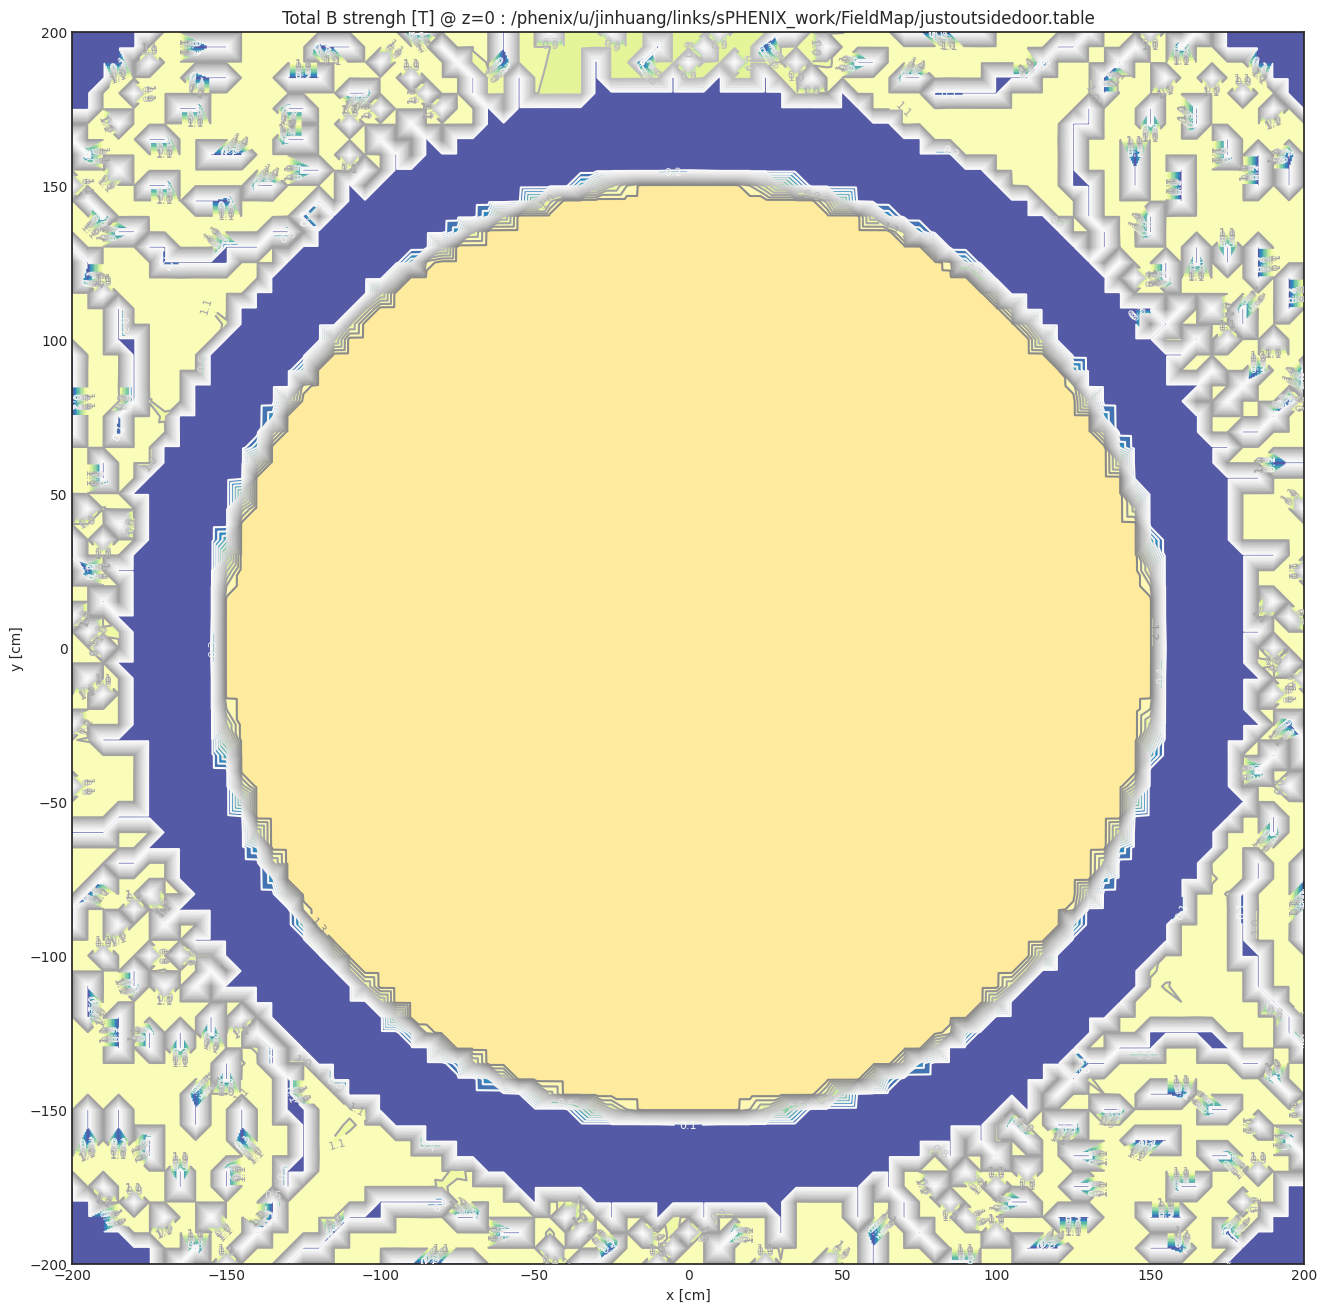

In [30]:
limits =  np.arange(0,2.5,.1);

fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ z=0 : " + MapFile3D)

fig.show()

## Check: folding data azimuthally to one sector

Next trick is for `z=0` plane, we can fold the HCal azimuthally 64 times to look at one sector. Then we have much better sampling of the space point

In [31]:



limits =  np.arange(0,2.5,.1);

/tmp/ipykernel_8471/3393381598.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


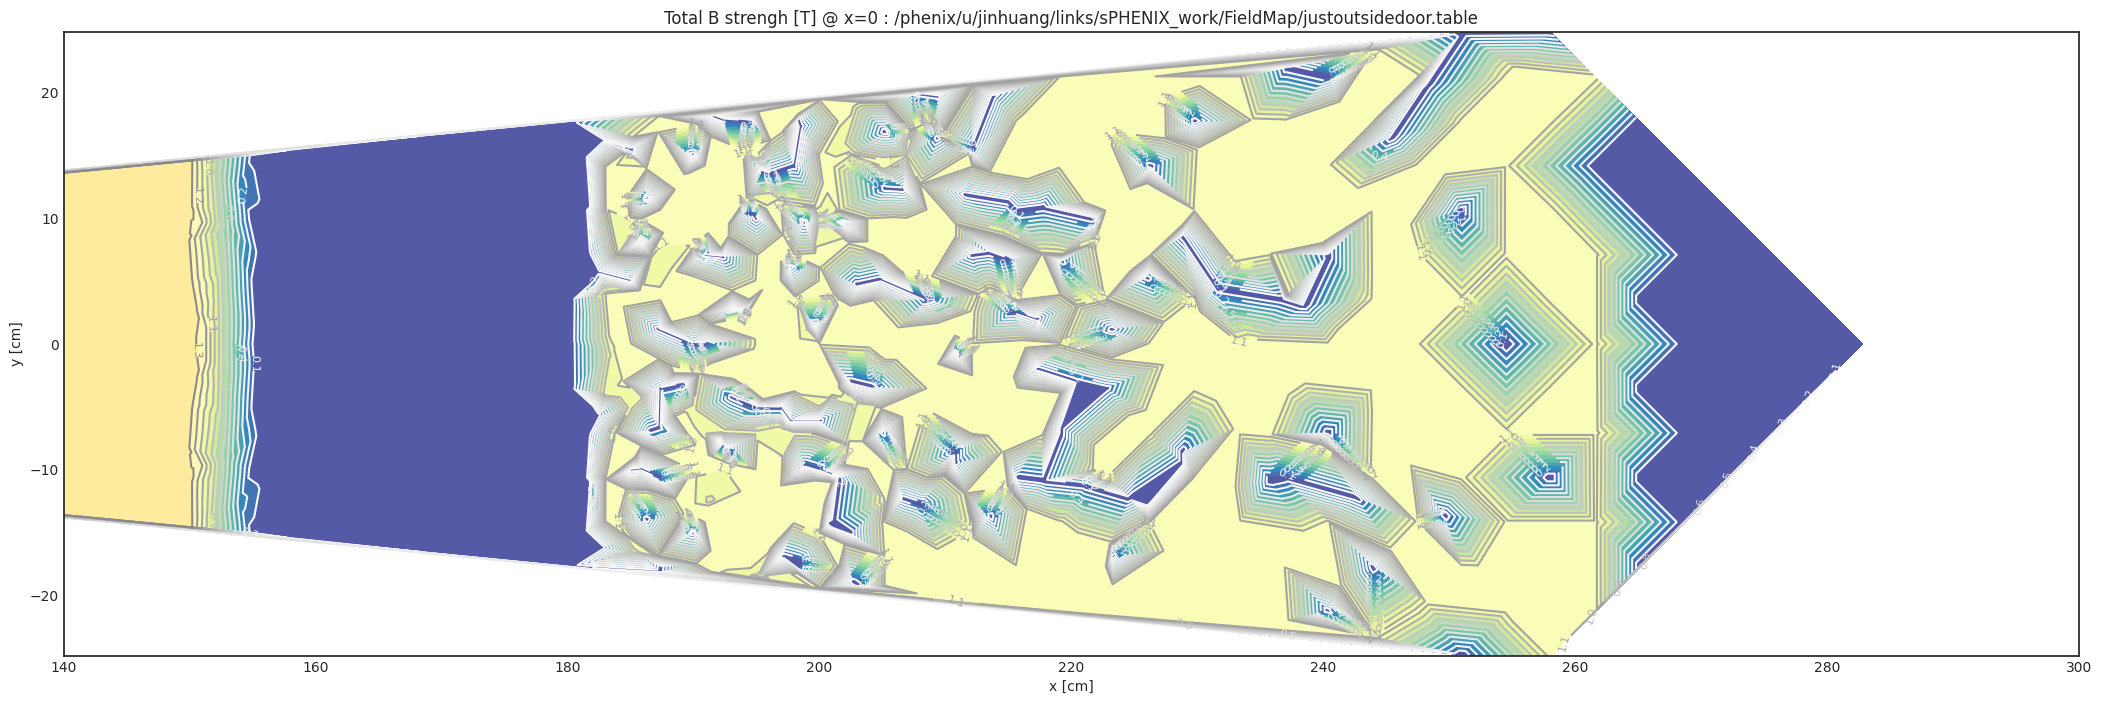

In [32]:
fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.tricontourf(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)
ax.set_xlim([140, 300])

fig.show()

In [33]:
df_fieldmap_xy

,x,Y_fold,X_fold,R,phi_fmod,B_tot,y,z,bx[Gauss],by[Gauss],bz[Gauss],hz[OERSTED],bx,by,bz
71,-200.0,0.000000e+00,282.842712,282.842712,0.000000e+00,0.000843,-200.0,0.0,0.965609,0.708317,-8.348093,-8.348093,0.000097,0.000071,-0.000835
214,-200.0,-3.535534e+00,279.307179,279.329554,-1.265755e-02,0.000823,-195.0,0.0,0.967097,0.703610,-8.139323,-8.139323,0.000097,0.000070,-0.000814
357,-200.0,-7.071068e+00,275.771645,275.862284,-2.563541e-02,0.000802,-190.0,0.0,0.960852,0.704264,-7.927292,-7.927292,0.000096,0.000070,-0.000793
500,-200.0,-1.060660e+01,272.236111,272.442655,-3.894134e-02,0.000780,-185.0,0.0,0.947092,0.700622,-7.711803,-7.711803,0.000095,0.000070,-0.000771
643,-200.0,-1.414214e+01,268.700577,269.072481,-5.258306e-02,0.000758,-180.0,0.0,0.904457,0.681577,-7.499370,-7.499370,0.000090,0.000068,-0.000750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937579,200.0,-1.414214e+01,268.700577,269.072481,-5.258306e-02,0.000818,180.0,0.0,-0.679883,-2.125159,-7.869621,-7.869621,-0.000068,-0.000213,-0.000787
937722,200.0,-1.060660e+01,272.236111,272.442655,-3.894134e-02,0.000842,185.0,0.0,-0.912399,-2.172502,-8.084999,-8.084999,-0.000091,-0.000217,-0.000808
937865,200.0,-7.071068e+00,275.771645,275.862284,-2.563541e-02,0.000864,190.0,0.0,-0.944099,-2.196933,-8.301044,-8.301044,-0.000094,-0.000220,-0.000830
938008,200.0,-3.535534e+00,279.307179,279.329554,-1.265755e-02,0.000885,195.0,0.0,-0.908167,-2.219411,-8.513827,-8.513827,-0.000091,-0.000222,-0.000851


The separation of the field in gap (<0.1 T) and in steel (>0.1 T) is very clear 

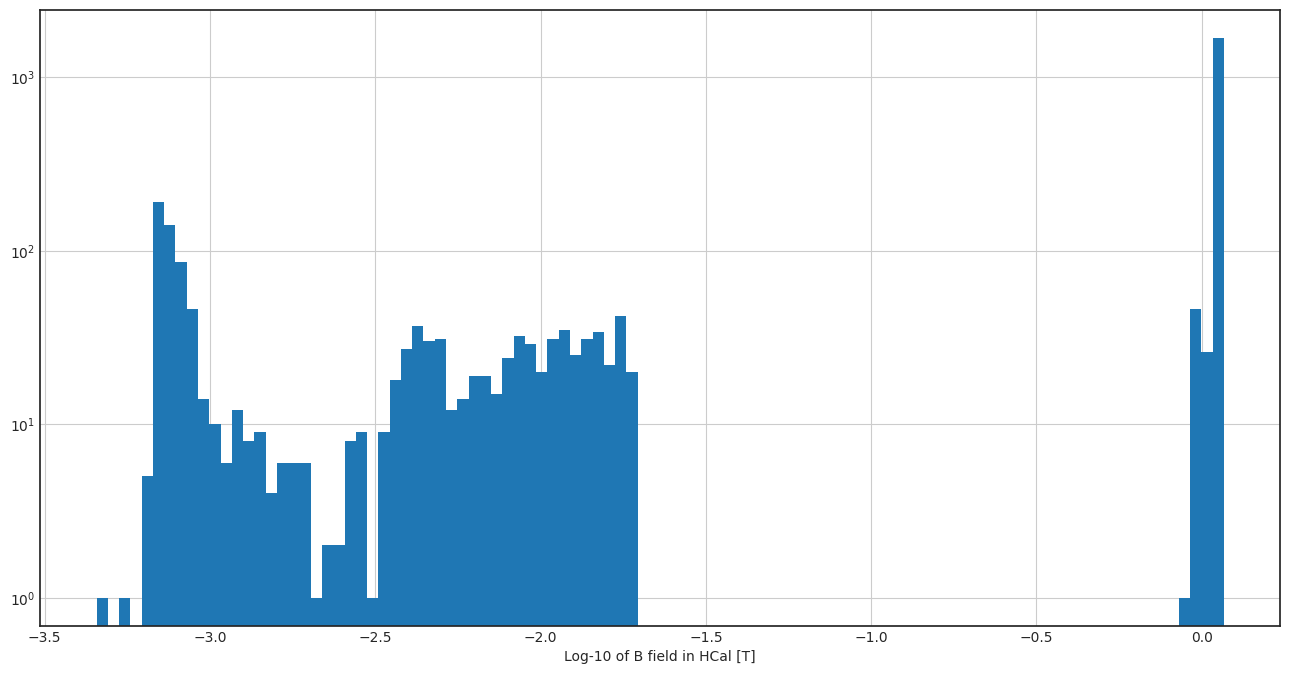

In [34]:
fig, ax = plt.subplots(figsize=(16,8))

hist = df_fieldmap_xy[(df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)].apply(lambda x: np.log10(x['B_tot']), axis=1).hist(bins=100)
ax.set_xlabel('Log-10 of B field in HCal [T]');
ax.set_yscale('log')

Now perform the separation according the field value. We can get two maps, one for in-steel, one outside for one sector. 

In [35]:
df_fieldmap_xy_steel = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] > 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]
df_fieldmap_xy_gap = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] < 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]

/tmp/ipykernel_8471/3477960979.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


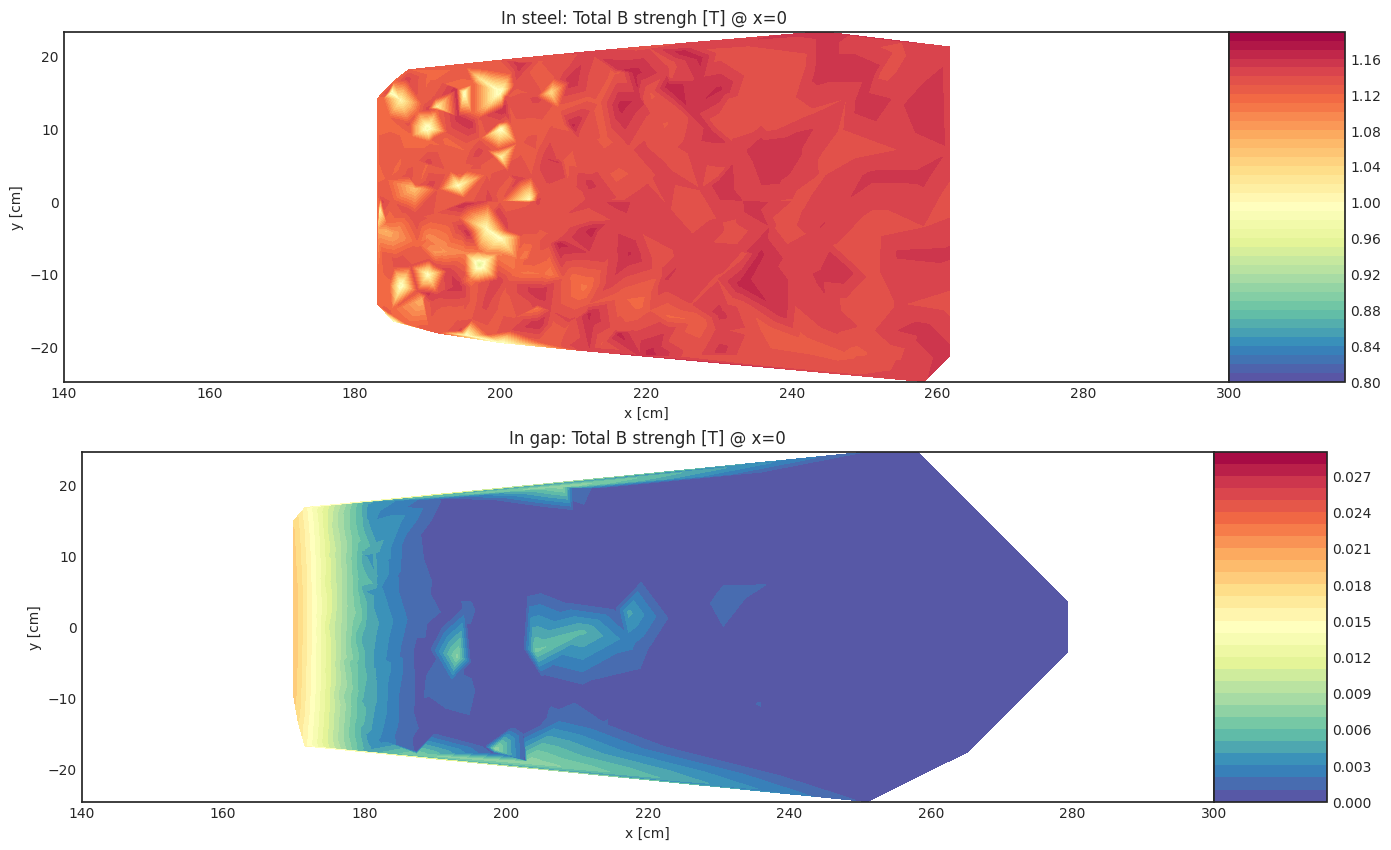

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(26,10))

ax = axs[0];

limits =  np.arange(.8,1.2,.01);
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values,limits, cmap='Spectral_r') 
# contours = ax.tricontour(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ x=0 " )
ax.set_xlim([140, 300])

ax = axs[1];

limits =  np.arange(0,.03,.001);
ax.set_aspect('equal')
tcf= ax.tricontourf(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values,limits, cmap='Spectral_r') 
# contours = ax.tricontour(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In gap: Total B strengh [T] @ x=0")
ax.set_xlim([140, 300])

fig.show()

The field point sampled in the gap between steel fins are there, just relatively rare and random. Given from gap to gap, the field changes smoothly, we can use these information to interpolate and rebuild the field in and out of the steel separately in the next section. 

/tmp/ipykernel_8471/4042682801.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


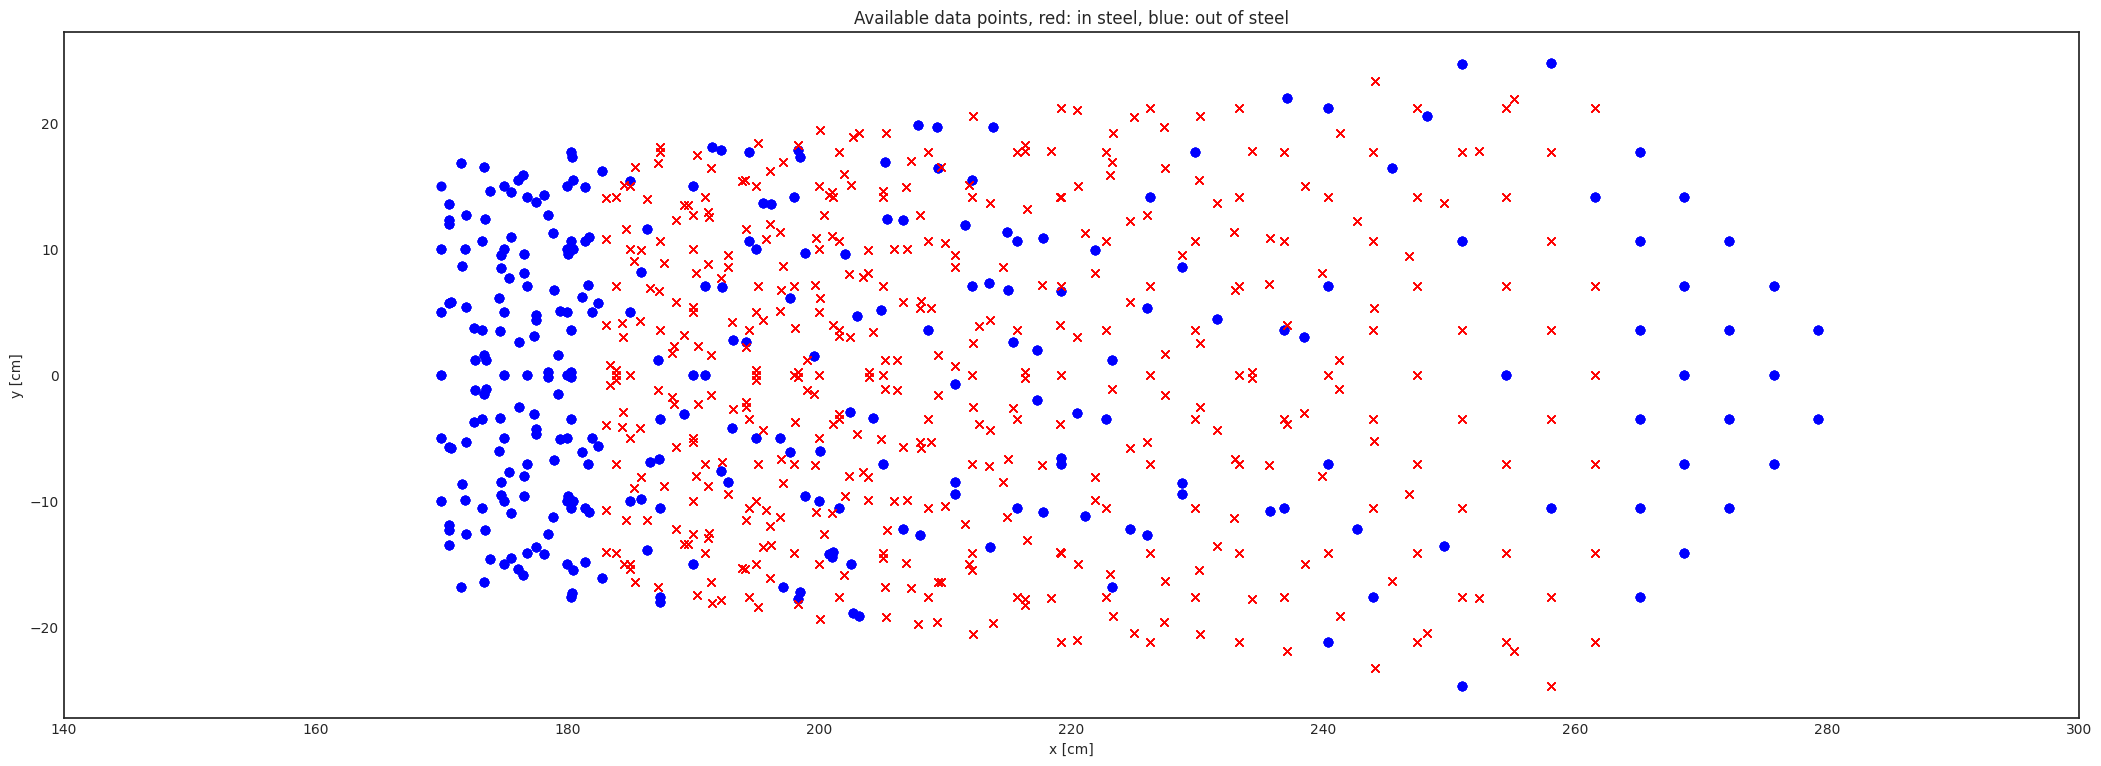

In [37]:
fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.plot(df_fieldmap_xy_gap['X_fold'], df_fieldmap_xy_gap['Y_fold'], 'o', color='blue')
ax.plot(df_fieldmap_xy_steel['X_fold'], df_fieldmap_xy_steel['Y_fold'], 'x', color='red')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Available data points, red: in steel, blue: out of steel")
ax.set_xlim([140, 300])

fig.show()

## Steel vol.-separated 3D field

In [38]:
# df_fieldmap_central = df_fieldmap[(df_fieldmap['z'] > -10) & (df_fieldmap['z'] < 10)]
df_fieldmap_central = df_fieldmap

In [39]:
# df_fieldmap_central

In [40]:
# # Expensive ops

if not exists('df_fieldmap_steel.hdf5'):

    df_fieldmap_central['R'] = df_fieldmap_central.apply(
        lambda x: np.sqrt(x['x']*x['x'] + x['y']*x['y'])
        , axis=1)

    df_fieldmap_central['In_Steel'] = df_fieldmap_central.apply(
        lambda x: (df_fieldmap_xy[(df_fieldmap_xy['x'] == x['x']) & (df_fieldmap_xy['y'] == x['y'])]['B_tot'].mean() > 0.1) & (x['R'] >=170) & ( x['R'] <=280)
        , axis=1)

    df_fieldmap_steel = df_fieldmap_central[(df_fieldmap_central['In_Steel'])].copy(deep=True)
    df_fieldmap_gap =  df_fieldmap_central[~(df_fieldmap_central['In_Steel'])].copy(deep=True)

    df_fieldmap_steel.to_hdf('df_fieldmap_steel.hdf5', "df_fieldmap_steel");
    df_fieldmap_gap.to_hdf('df_fieldmap_gap.hdf5', "df_fieldmap_gap");


In [41]:
# Load preprocessed results
import uproot
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

import numpy as np

df_fieldmap_steel = pd.read_hdf('df_fieldmap_steel.hdf5', "df_fieldmap_steel");
df_fieldmap_gap= pd.read_hdf('df_fieldmap_gap.hdf5', "df_fieldmap_gap");
df_fieldmap_steel

/tmp/ipykernel_8471/1825635328.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


,x,y,z,bx[Gauss],by[Gauss],bz[Gauss],hz[OERSTED],bx,by,bz,R,In_Steel
858,-200.0,-170.0,-355.0,18.178628,4.693014,130.814390,130.814390,0.001818,0.000469,0.013081,262.488095,True
859,-200.0,-170.0,-350.0,369.786105,1777.769566,56.024800,0.003941,0.036979,0.177777,0.005602,262.488095,True
860,-200.0,-170.0,-345.0,377.461137,1760.029305,-169.553427,-0.012064,0.037746,0.176003,-0.016955,262.488095,True
861,-200.0,-170.0,-340.0,335.776755,1718.579915,-402.712080,-0.028234,0.033578,0.171858,-0.040271,262.488095,True
862,-200.0,-170.0,-335.0,336.242426,1613.019651,-657.484928,-0.044624,0.033624,0.161302,-0.065748,262.488095,True
...,...,...,...,...,...,...,...,...,...,...,...,...
937360,200.0,170.0,335.0,931.160366,1202.914482,-758.252302,-0.046613,0.093116,0.120291,-0.075825,262.488095,True
937361,200.0,170.0,340.0,926.395743,1376.421482,-452.346912,-0.028842,0.092640,0.137642,-0.045235,262.488095,True
937362,200.0,170.0,345.0,972.721812,1430.390224,-185.035468,-0.012156,0.097272,0.143039,-0.018504,262.488095,True
937363,200.0,170.0,350.0,971.707414,1450.956843,60.982426,0.003917,0.097171,0.145096,0.006098,262.488095,True


Back to unfolded space, here is the available points in-steel vs out of steel, which is sparsely distributed in the outer HCal

/tmp/ipykernel_8471/754486461.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


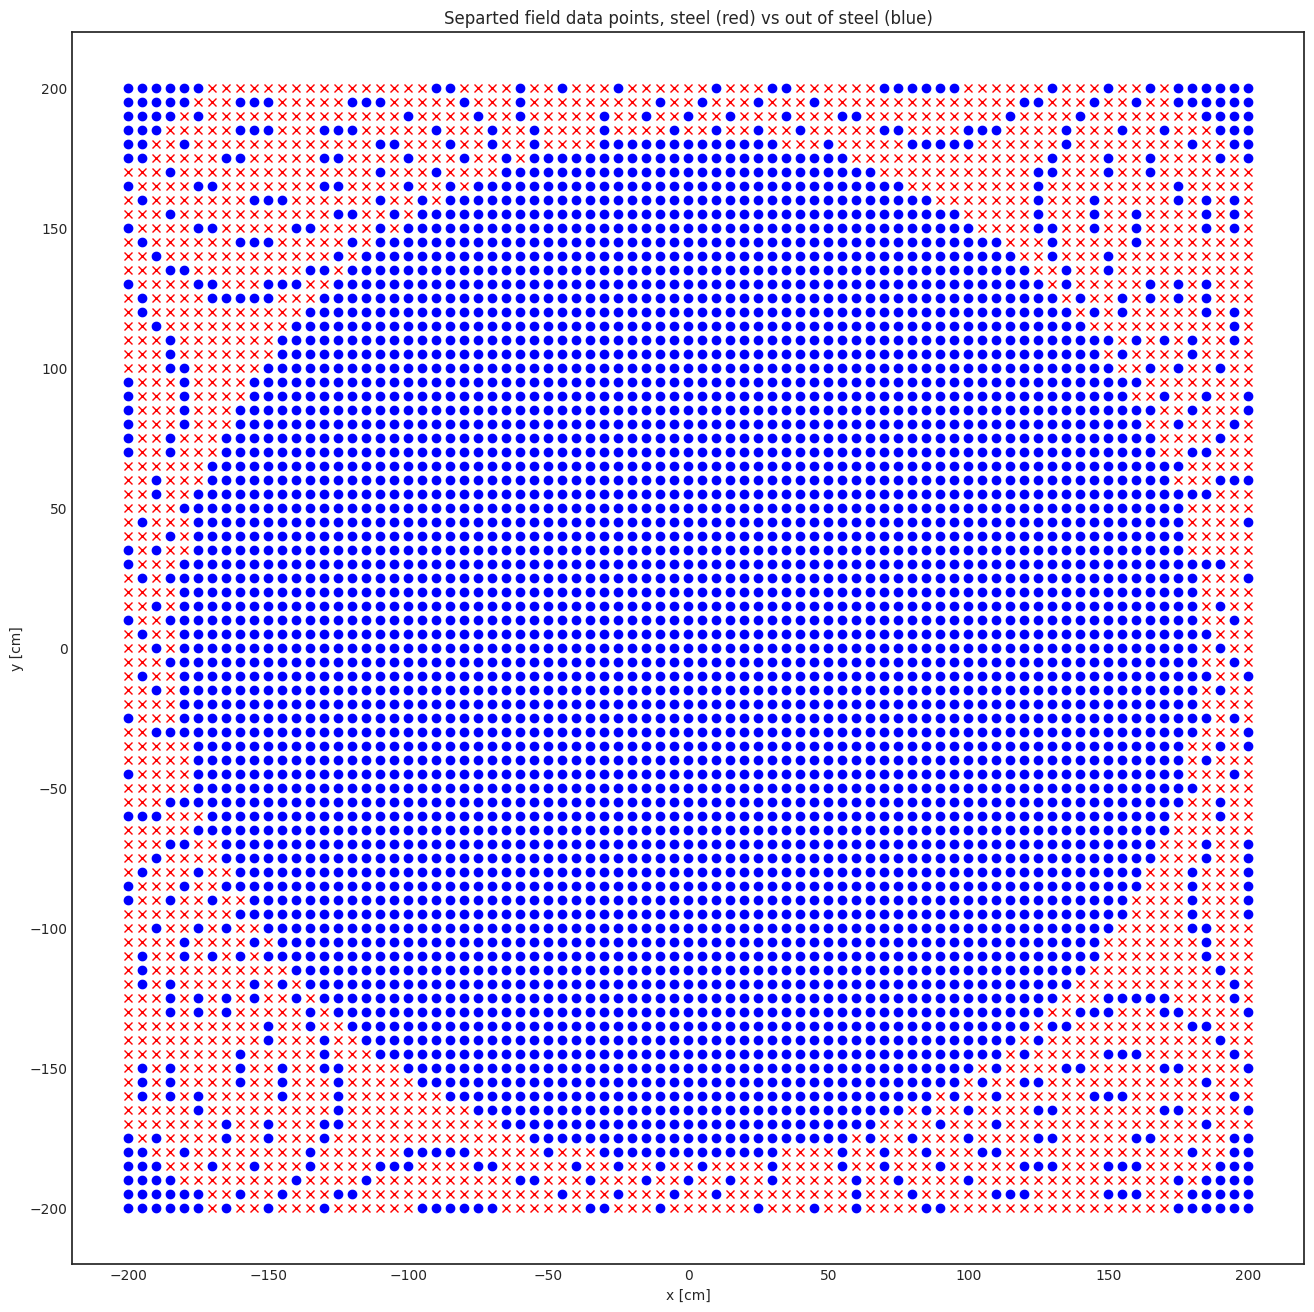

In [42]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == 0]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] == 0]

fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.plot(df_fieldmap_xy_gap['x'], df_fieldmap_xy_gap['y'], 'o', color='blue')
ax.plot(df_fieldmap_xy_steel['x'], df_fieldmap_xy_steel['y'], 'x', color='red')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Separted field data points, steel (red) vs out of steel (blue)")

fig.show()

Steel separated 3D field at z=0 plane: 

/tmp/ipykernel_8471/3520409933.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


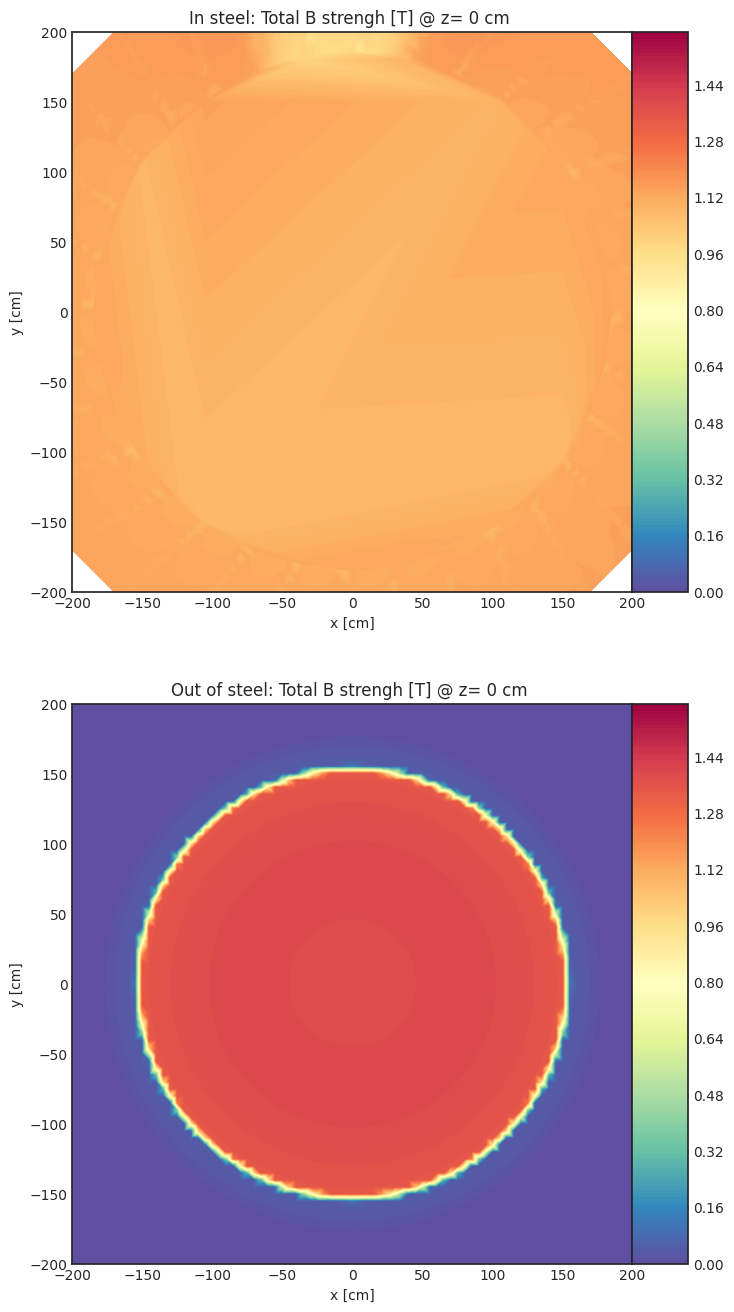

In [43]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == 0]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] ==0]


limits =  np.arange(0,1.6,.01);

fig, axs = plt.subplots(2,1, figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['x'].values, df_fieldmap_xy_steel['y'].values, df_fieldmap_xy_steel.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ z= 0 cm ")


ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_gap['x'].values, df_fieldmap_xy_gap['y'].values, df_fieldmap_xy_gap.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Out of steel: Total B strengh [T] @ z= 0 cm ")

fig.show()

Steel separated 3D field at z=-250 plane, that include the HCal cut off for the magnet chimney. A field irregularity is obvious around the cut off structure. 

/tmp/ipykernel_8471/2553891464.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


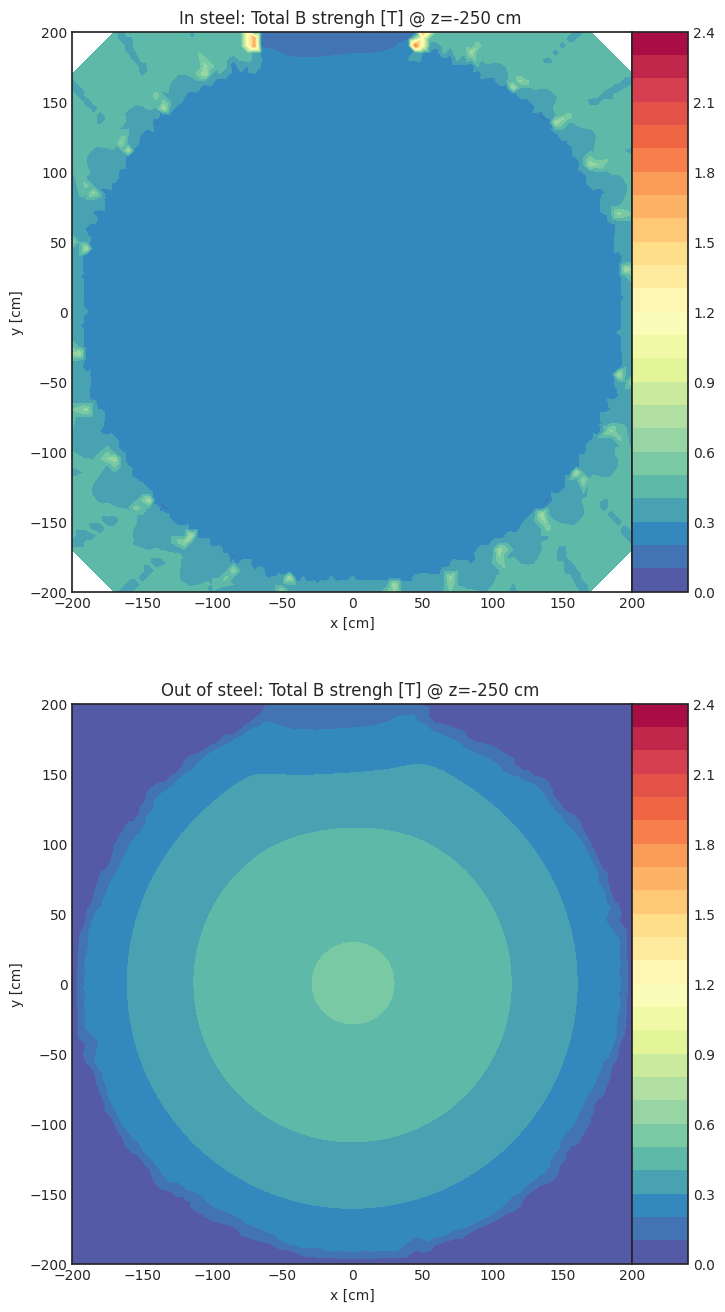

In [44]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == -250]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] == -250]


limits =  np.arange(0,2.5,.1);

fig, axs = plt.subplots(2,1, figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['x'].values, df_fieldmap_xy_steel['y'].values, df_fieldmap_xy_steel.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ z=-250 cm ")


ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_gap['x'].values, df_fieldmap_xy_gap['y'].values, df_fieldmap_xy_gap.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Out of steel: Total B strengh [T] @ z=-250 cm ")

fig.show()

/tmp/ipykernel_8471/4265151483.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


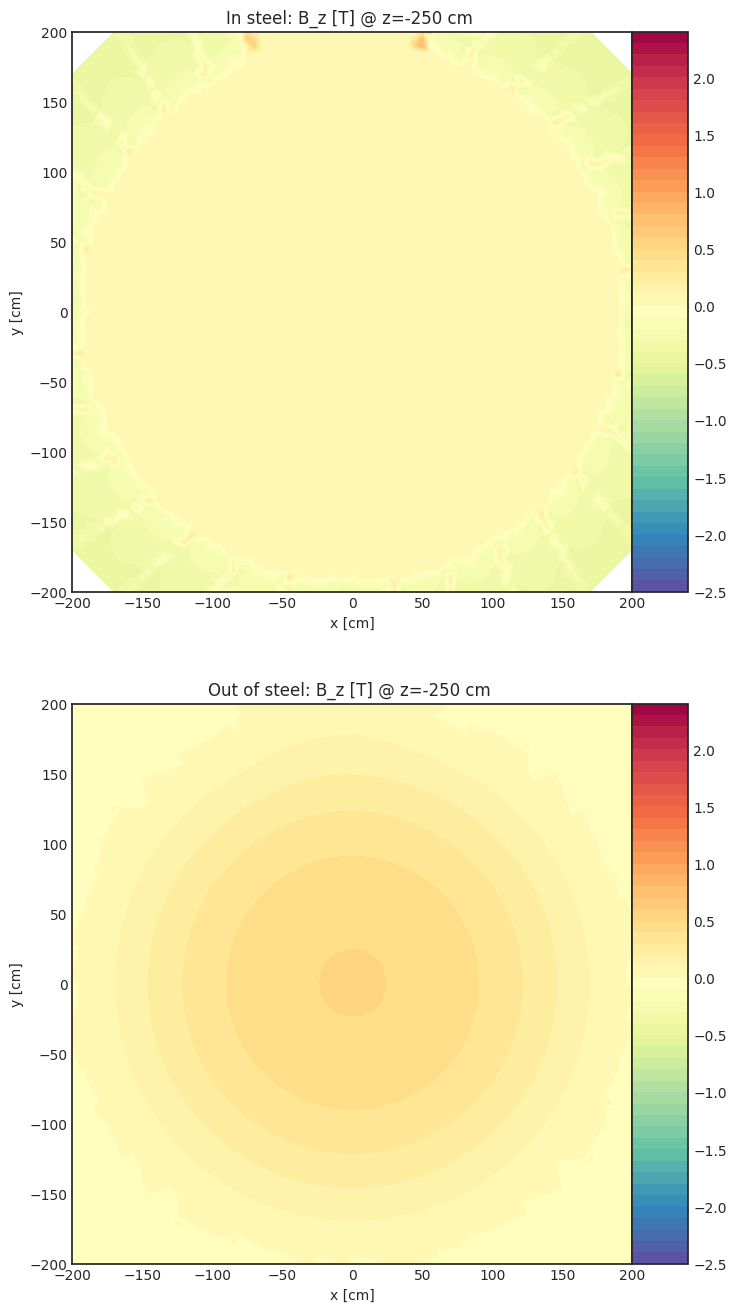

In [45]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == -250]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] == -250]


limits =  np.arange(-2.5,2.5,.1);

fig, axs = plt.subplots(2,1, figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['x'].values, df_fieldmap_xy_steel['y'].values,  df_fieldmap_xy_steel['bz'].values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: B_z [T] @ z=-250 cm ")


ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_gap['x'].values, df_fieldmap_xy_gap['y'].values,  df_fieldmap_xy_gap['bz'].values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Out of steel: B_z [T] @ z=-250 cm ")

fig.show()

# Rebuild map with in/out steel separation

Now the rebuilding part to make two 3D field map, one for gap and one for steel vols in Geant4. It is OK if the simulation has a small geometry offset from the field calculation, as the field for each of these two types of volumns are mostly continous function through the 3D space. Then we can rely on Geant4 vol tracking to determine the volumn boundary. 

We use a 3D linear interpolation to map out the field in gap and steel separately with `scipy.interpolate.griddata`. One trick to speed up calculation is to interpolate at the same z-grid as the original field map (2cm grid), then the interpolation become 2D problem at each z-plane independently. 

In [46]:
df_fieldmap_steel_rebuild = pd.DataFrame({"x":[] , "y":[] , "z":[] , "bx":[] , "by":[] , "bz":[] , })
df_fieldmap_gap_rebuild = df_fieldmap_steel_rebuild.copy()


In [47]:
# expensive operation

from scipy.interpolate import griddata as griddata

if not exists('df_fieldmap_steel_rebuild.hdf5'):
    
    zs = df_fieldmap.z.unique()

    for z in zs:
    # for z in [0]: 
        print(f"processing z = {z}")

        df_fieldmap_zselect =  df_fieldmap[df_fieldmap['z'] == z]
        df_fieldmap_steel_zselect =  df_fieldmap_steel[df_fieldmap_steel['z'] == z]
        df_fieldmap_gap_zselect =  df_fieldmap_gap[df_fieldmap_gap['z'] == z]

        df_fieldmap_steel_rebuild_zselect = pd.DataFrame({"x":df_fieldmap_zselect.x 
                          , "y":df_fieldmap_zselect.y 
                          , "z":df_fieldmap_zselect.z 
                          , "bx":np.nan_to_num(griddata((df_fieldmap_steel_zselect.x,df_fieldmap_steel_zselect.y)
                              , df_fieldmap_steel_zselect.bx, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "by":np.nan_to_num(griddata((df_fieldmap_steel_zselect.x,df_fieldmap_steel_zselect.y)
                              , df_fieldmap_steel_zselect.by, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "bz":np.nan_to_num(griddata((df_fieldmap_steel_zselect.x,df_fieldmap_steel_zselect.y)
                              , df_fieldmap_steel_zselect.bz, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear'))
                          , })
        df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


        df_fieldmap_gap_rebuild_zselect = pd.DataFrame({"x":df_fieldmap_zselect.x 
                          , "y":df_fieldmap_zselect.y 
                          , "z":df_fieldmap_zselect.z 
                          , "bx":np.nan_to_num(griddata((df_fieldmap_gap_zselect.x,df_fieldmap_gap_zselect.y)
                              , df_fieldmap_gap_zselect.bx, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "by":np.nan_to_num(griddata((df_fieldmap_gap_zselect.x,df_fieldmap_gap_zselect.y)
                              , df_fieldmap_gap_zselect.by, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "bz":np.nan_to_num(griddata((df_fieldmap_gap_zselect.x,df_fieldmap_gap_zselect.y)
                              , df_fieldmap_gap_zselect.bz, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear'))
                          , })
        df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)


    df_fieldmap_steel_rebuild.to_hdf('df_fieldmap_steel_rebuild.hdf5', "df_fieldmap_steel_rebuild");
    df_fieldmap_gap_rebuild.to_hdf('df_fieldmap_gap_rebuild.hdf5', "df_fieldmap_gap_rebuild");

processing z = -355.0


/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -350.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -345.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -340.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -335.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -330.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -325.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -320.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -315.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -310.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -305.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -300.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -295.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -290.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -285.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -280.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -275.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -270.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -265.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -260.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -255.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -250.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -245.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -240.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -235.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -230.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -225.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -220.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -215.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -210.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -205.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -200.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -195.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -190.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -185.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -180.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -175.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -170.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -165.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -160.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -155.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -150.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -145.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -140.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -135.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -130.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -125.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -120.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -115.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -110.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -105.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -100.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -95.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -90.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -85.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -80.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -75.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -70.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -65.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -60.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -55.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -50.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -45.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -40.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -35.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -30.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -25.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -20.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -15.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -10.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = -5.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 0.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 5.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 10.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 15.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 20.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 25.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 30.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 35.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 40.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 45.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 50.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 55.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 60.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 65.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 70.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 75.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 80.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 85.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 90.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 95.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 100.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 105.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)


processing z = 110.0


/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 115.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 120.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 125.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 130.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 135.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 140.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 145.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 150.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 155.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 160.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 165.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 170.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 175.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 180.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 185.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 190.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 195.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 200.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 205.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 210.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 215.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 220.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 225.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 230.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 235.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 240.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 245.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 250.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 255.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 260.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 265.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 270.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 275.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 280.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 285.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 290.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 295.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 300.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 305.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 310.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 315.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 320.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 325.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 330.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 335.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 340.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 345.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 350.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)
/tmp/ipykernel_8471/444475478.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


processing z = 355.0


/tmp/ipykernel_8471/444475478.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)


In [48]:
df_fieldmap_steel_rebuild = pd.read_hdf('df_fieldmap_steel_rebuild.hdf5', "df_fieldmap_steel_rebuild");
df_fieldmap_gap_rebuild = pd.read_hdf('df_fieldmap_gap_rebuild.hdf5', "df_fieldmap_gap_rebuild");

Here is quick check plot for a given $z$ plane for the set of two field map

/tmp/ipykernel_8471/2984043528.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


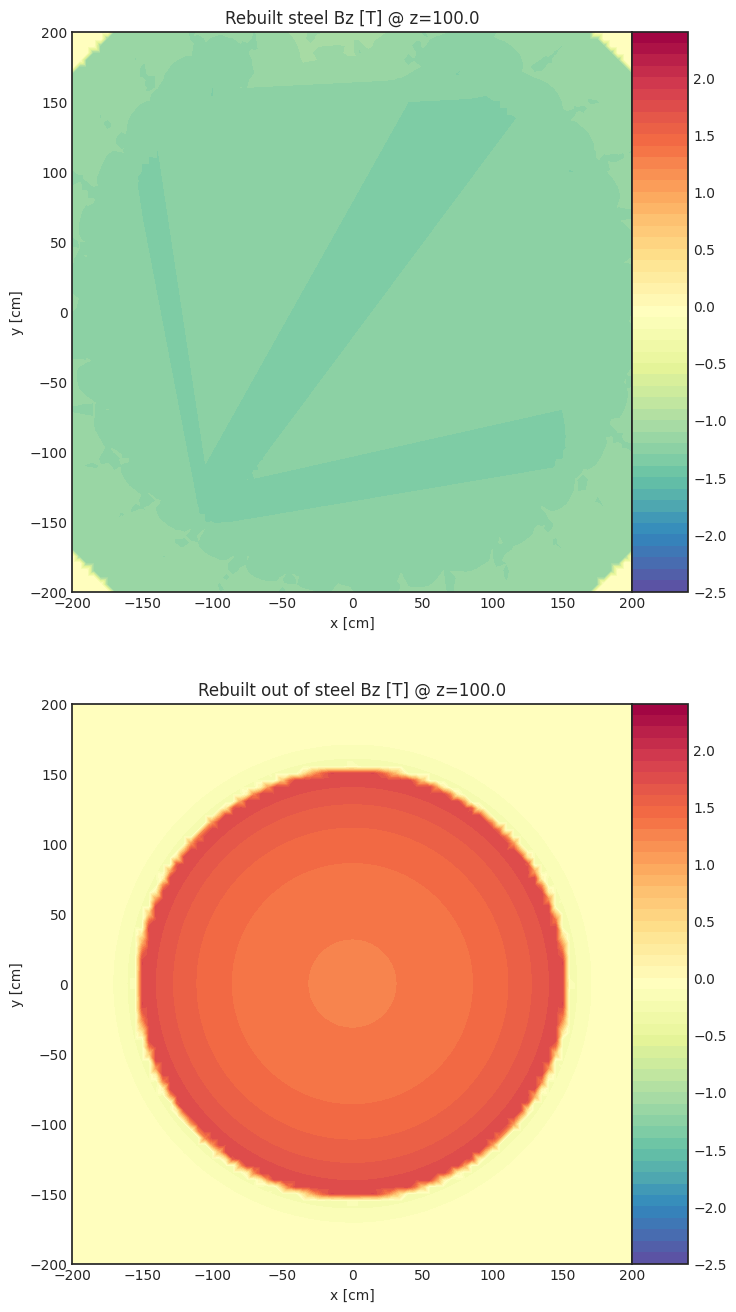

In [49]:
limits =  np.arange(0-2.5,2.5,.1);

df_fieldmap_steel_zselect = df_fieldmap_steel_rebuild[df_fieldmap_steel_rebuild['z'] == 100]
df_fieldmap_gap_rebuild_zselect = df_fieldmap_gap_rebuild[df_fieldmap_gap_rebuild['z'] == 100]

fig, axs = plt.subplots(2,1,figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(
    df_fieldmap_steel_zselect['x'].values
    ,df_fieldmap_steel_zselect['y'].values
    ,df_fieldmap_steel_zselect['bz'].values
    ,limits, cmap='Spectral_r') 
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title(f"Rebuilt steel Bz [T] @ z={df_fieldmap_steel_zselect.z.iloc[0]}")

ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(
    df_fieldmap_gap_rebuild_zselect['x'].values
    ,df_fieldmap_gap_rebuild_zselect['y'].values
    ,df_fieldmap_gap_rebuild_zselect['bz'].values
    ,limits, cmap='Spectral_r') 
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title(f"Rebuilt out of steel Bz [T] @ z={df_fieldmap_gap_rebuild_zselect.z.iloc[0]}")

fig.show()

Output to field map in the ROOT file format

In [50]:

if not exists('sphenix3dbigmapxyz_gap_rebuild.root'):
    TFile_fieldmap_gap_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_gap_rebuild.root","recreate")
    TNtuple_fieldmap_gap_rebuild = ROOT.TNtuple("fieldmap"
                                              , "Rebuilt field map out side the HCal steel vol."
                                             , "x:y:z:bx:by:bz")

    counter = 0
    for index, row in df_fieldmap_gap_rebuild.iterrows():
        if counter % 100000 == 0:
            print(f"Processing {counter}")
        counter = counter + 1

        TNtuple_fieldmap_gap_rebuild.Fill(row.x, row.y, row.z, row.bx, row.by, row.bz)

    TFile_fieldmap_gap_rebuild.Write()

Processing 0
Processing 100000
Processing 200000
Processing 300000
Processing 400000
Processing 500000
Processing 600000
Processing 700000
Processing 800000
Processing 900000


In [51]:
TFile_fieldmap_gap_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_gap_rebuild.root")

display(Markdown(f"`{TFile_fieldmap_gap_rebuild.GetName()}` contains {TFile_fieldmap_gap_rebuild.fieldmap.GetEntries()} records. First record:"))
TFile_fieldmap_gap_rebuild.fieldmap.Show(0)

`sphenix3dbigmapxyz_gap_rebuild.root` contains 938223 records. First record:

======> EVENT:0
 x               = -200
 y               = -200
 z               = -355
 bx              = 0.0140554
 by              = 0.0140953
 bz              = 0.00499612


In [52]:

if not exists('sphenix3dbigmapxyz_steel_rebuild.root'):

    TFile_fieldmap_steel_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_steel_rebuild.root","recreate")
    TNtuple_fieldmap_steel_rebuild = ROOT.TNtuple("fieldmap"
                                              , "Rebuilt field map out side the HCal steel vol."
                                             , "x:y:z:bx:by:bz")

    counter = 0
    for index, row in df_fieldmap_steel_rebuild.iterrows():
        if counter % 100000 == 0:
            print(f"Processing {counter}")
        counter = counter + 1

        TNtuple_fieldmap_steel_rebuild.Fill(row.x, row.y, row.z, row.bx, row.by, row.bz)

    TFile_fieldmap_steel_rebuild.Write()

Processing 0
Processing 100000
Processing 200000
Processing 300000
Processing 400000
Processing 500000
Processing 600000
Processing 700000
Processing 800000
Processing 900000


In [53]:
TFile_fieldmap_steel_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_steel_rebuild.root")

display(Markdown(f"`{TFile_fieldmap_steel_rebuild.GetName()}` contains {TFile_fieldmap_steel_rebuild.fieldmap.GetEntries()} records. 10000000th record:"))
TFile_fieldmap_steel_rebuild.fieldmap.Show(10000000)

`sphenix3dbigmapxyz_steel_rebuild.root` contains 938223 records. 10000000th record:

Error in <TNtuple::Show()>: Cannot read entry 10000000 (entry does not exist)
